In [1]:
import glob
import sys

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager

from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist, plot_bode, plot_residuals
from impedance import preprocessing
from impedance.models.circuits.elements import G

sys.path.insert(0, '..')
import analyze_comsol as an_com
import ImpedanceCorrection as ic

%reload_ext autoreload
%autoreload 2

In [2]:
def read_EIS_data(direc, f_name, z_format=preprocessing.readZPlot):
    f, Z = z_format(direc + f_name)
    # enforce frequencies from high to low
    Z = Z[np.argsort(f)[::-1]]
    f = f[np.argsort(f)[::-1]]

#     f, Z = preprocessing.ignoreBelowX(f, Z)
    return f, Z

### Read in patterned electrode data

In [3]:
data_dir = '..\EIS Data'
file_str1 = r'\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par'
file_str10 = r'\LSC_DPB1_FRXAS_700C_10%_EIS_OCV_after.par'
file_str100 = r'\LSC_DPB1_FRXAS_700C_100%_EIS_OCV_before2.par'

f_1, Z_1 = read_EIS_data(data_dir, file_str1, z_format=preprocessing.readVersaStudio)
f_10, Z_10 = read_EIS_data(data_dir, file_str10, z_format=preprocessing.readVersaStudio)
f_100, Z_100 = read_EIS_data(data_dir, file_str100, z_format=preprocessing.readVersaStudio)

f_1, Z_1 = preprocessing.ignoreBelowX(f_1, Z_1)
f_10, Z_10 = preprocessing.ignoreBelowX(f_10, Z_10)
f_100, Z_100 = preprocessing.ignoreBelowX(f_100, Z_100)

# L0 = 1e-1
# Z_1 = ic.subtract_series_L(f_1, Z_1, L0)
# Z_10 = ic.subtract_series_L(f_10, Z_10, L0)
# Z_100 = ic.subtract_series_L(f_100, Z_100, L0)

print(f_1[19], f_1[-1])
print(f_10[20], f_10[-1])
print(f_100[19], f_100[-1])

# fname_w_Zg = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_Zg_3.svg'
# fname_w_par = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_parallel_2.svg'

fs_list = [f_1, f_10, f_100]
Zs_list = [Z_1, Z_10, Z_100]

464.1589 0.02154435
794.3282 0.007943282
359.3814 0.1


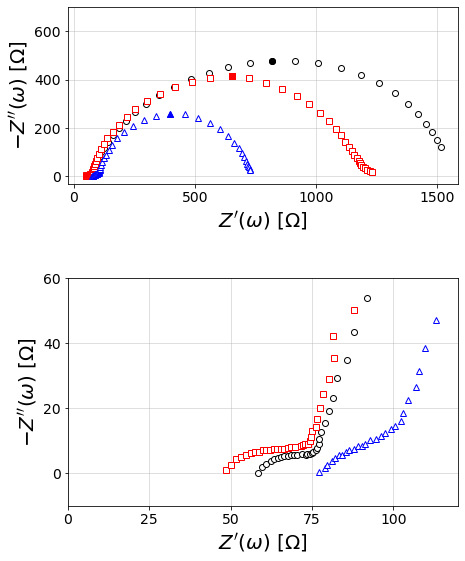

In [4]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    f_peak, Z_peak = ic.find_peak_f_Z(f, Z)
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')
    plot_nyquist(axes[1], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

## Read in NoHole sample data

In [5]:
data_dir = '..\EIS Data'
file_str1 = r'\NoHoleAl2O3_8h_700C_1%2_EIS-2.z'
file_str10 = r'\NoHoleAl2O3_8h_700C_10%_EIS-2.z'
file_str100 = r'\NoHoleAl2O3_8h_700C_100%_EIS-3.z'

f_1nh, Z_1nh = read_EIS_data(data_dir, file_str1, z_format=preprocessing.readZPlot)
f_10nh, Z_10nh = read_EIS_data(data_dir, file_str10, z_format=preprocessing.readZPlot)
f_100nh, Z_100nh = read_EIS_data(data_dir, file_str100, z_format=preprocessing.readZPlot)

f_1nh, Z_1nh = preprocessing.ignoreBelowX(f_1nh, Z_1nh)
f_10nh, Z_10nh = preprocessing.ignoreBelowX(f_10nh, Z_10nh)
f_100nh, Z_100nh = preprocessing.ignoreBelowX(f_100nh, Z_100nh)

# Z_1nh = Z_1nh - Z_1nh[np.argmin(np.abs(Z_1nh))].real
# Z_10nh = Z_10nh - Z_10nh[np.argmin(np.abs(Z_10nh))].real
# Z_100nh = Z_100nh - Z_100nh[np.argmin(np.abs(Z_100nh))].real

print(f_1nh[28], f_1nh[-1])
print(f_10nh[29], f_10nh[-1])
print(f_100nh[28], f_100nh[-1])

fs_nh_list = [f_1nh, f_10nh, f_100nh]
Zs_nh_list = [Z_1nh, Z_10nh, Z_100nh]

464.1589 0.00036
278.256 0.002154435
278.256 0.0005994843


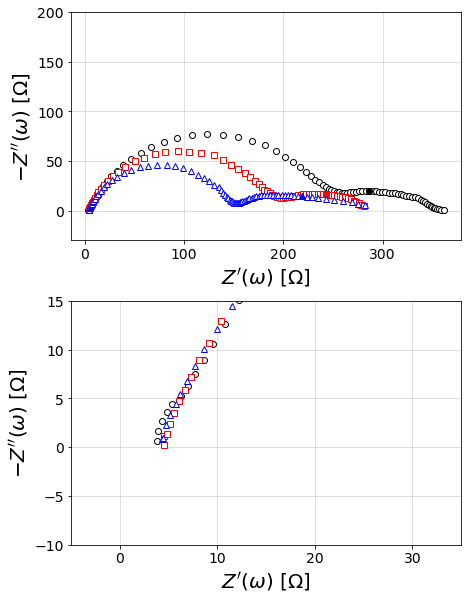

In [6]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_nh_list, Zs_nh_list)):
    f_peak, Z_peak = ic.find_peak_f_Z(f, Z)
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')
    plot_nyquist(axes[1], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


axes[0].set_ylim(-30, 200)
axes[1].set_xlim(-5, 35)
axes[1].set_ylim(-10, 15)
plt.show()

## The patterned electrode and NoHole sample frequency lists need to be identical for proper admittance subtraction

In [7]:
fs = f_100
fs_nh = f_100nh
for f_nh in fs_nh:
    ind = np.argwhere(np.isclose(np.log10(f_nh), np.log10(fs), atol=1e-2))
    print(f_nh, ind, fs[ind], np.log10(fs[ind]) - np.log10(f_nh))

359381.4 [] [] []
278255.9 [] [] []
215443.5 [] [] []
166810.0 [] [] []
129155.0 [] [] []
100000.0 [] [] []
77426.37 [] [] []
59948.43 [] [] []
46415.89 [[0]] [[46415.89]] [[0.]]
35938.14 [[1]] [[35938.14]] [[0.]]
27825.59 [[2]] [[27825.59]] [[0.]]
21544.35 [[3]] [[21544.35]] [[0.]]
16681.01 [[4]] [[16681.01]] [[0.]]
12915.5 [[5]] [[12915.5]] [[0.]]
10000.0 [[6]] [[10000.]] [[0.]]
7742.637 [[7]] [[7742.637]] [[0.]]
5994.842 [[8]] [[5994.842]] [[0.]]
4641.589 [[9]] [[4641.589]] [[0.]]
3593.814 [[10]] [[3593.814]] [[0.]]
2782.559 [[11]] [[2782.559]] [[0.]]
2154.435 [[12]] [[2154.435]] [[0.]]
1668.101 [[13]] [[1668.101]] [[0.]]
1291.55 [[14]] [[1291.55]] [[0.]]
1000.0 [[15]] [[1000.]] [[0.]]
774.2637 [[16]] [[774.2637]] [[0.]]
599.4843 [[17]] [[599.4843]] [[0.]]
464.1589 [[18]] [[464.1589]] [[0.]]
359.3814 [[19]] [[359.3814]] [[0.]]
278.256 [[20]] [[278.256]] [[0.]]
215.4435 [[21]] [[215.4435]] [[0.]]
166.8101 [[22]] [[166.8101]] [[0.]]
129.155 [[23]] [[129.155]] [[0.]]
100.0 [[24]] [[100

In [8]:
low_overlaps, high_overlaps = [], []

for i, (f, Z, fnh, Znh) in enumerate(zip(fs_list, Zs_list, fs_nh_list, Zs_nh_list)):
    high_overlap = np.argwhere(fnh >= f[0])[-1, 0]
    low_overlap = np.argwhere(fnh <= f[-1])[0, 0]
    
    high_overlaps.append(high_overlap)
    low_overlaps.append(low_overlap)
    print(f'Hi f {f[0]} Hi f NH {fnh[high_overlap]} {high_overlap} \t Low f {f[-1]} Low f NH {fnh[low_overlap]} {low_overlap} ')
#     print(np.log10(f), '\n', np.log10(fnh[high_overlap[-1, 0]:low_overlap[0, 0]+1]))
#     fnh = fnh[high_overlap[-1, 0]:low_overlap[0, 0]+1]
#     f_dum = []
#     print(np.argwhere(np.isclose(np.log10(f), np.log10(fnh))))
#     fs_nh_list[i] = 

Hi f 59948.43 Hi f NH 59948.43 9 	 Low f 0.02154435 Low f NH 0.02154 67 
Hi f 79432.82 Hi f NH 100000.0 6 	 Low f 0.007943282 Low f NH 0.007742637 70 
Hi f 46415.89 Hi f NH 46415.89 8 	 Low f 0.1 Low f NH 0.1 59 


## Well, this is problematic. The 10% NoHole Sample measurements use 9 points per frequency decade whereas the patterned electrode sample uses 10 points per decade. I suppose we need to fit the 10% NoHole sample measurements and then use the circuit model to predict impedance using the patterned electrode frequency list

In [9]:
weights = np.ones((len(f_10nh),))
weights[18:] = 0.1


Circuit string: L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)
Fit: True

Initial guesses:
     L0 = 2.00e-06 [H]
     R0 = 4.51e+00 [Ohm]
     R1 = 1.93e+02 [Ohm]
  CPE1_0 = 7.61e-06 [Ohm^-1 sec^a]
  CPE1_1 = 7.30e-01 []
     R2 = 6.00e+01 [Ohm]
  CPE2_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []
     R3 = 4.00e+01 [Ohm]
  CPE3_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE3_1 = 7.00e-01 []

Fit parameters:
     L0 = 8.50e-07  (+/- 1.78e-07) [H]
     R0 = 3.04e+00  (+/- 2.47e-01) [Ohm]
     R1 = 1.82e+02  (+/- 1.44e+00) [Ohm]
  CPE1_0 = 7.85e-06  (+/- 2.47e-07) [Ohm^-1 sec^a]
  CPE1_1 = 7.31e-01  (+/- 3.76e-03) []
     R2 = 1.24e+01  (+/- 6.88e+00) [Ohm]
  CPE2_0 = 8.54e-01  (+/- 8.20e-01) [Ohm^-1 sec^a]
  CPE2_1 = 9.56e-01  (+/- 1.54e-01) []
     R3 = 8.58e+01  (+/- 9.84e+00) [Ohm]
  CPE3_0 = 8.56e-03  (+/- 5.01e-04) [Ohm^-1 sec^a]
  CPE3_1 = 4.56e-01  (+/- 3.09e-02) []
 
 0.5872321062165886 0.6970044754051347


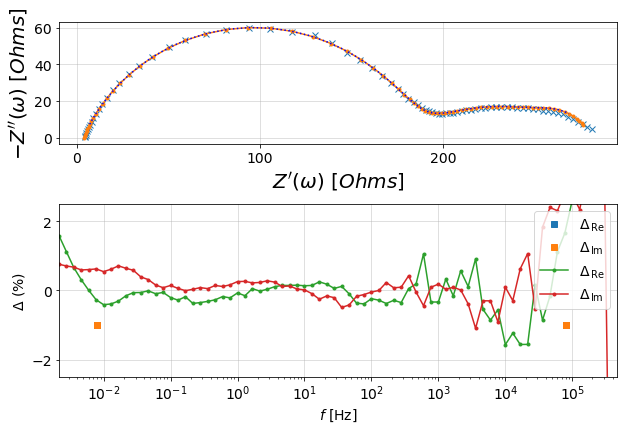

In [10]:
# With 3 CPEs
L0 = 2e-6
circ_str = "L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)"
R0 = Z_10nh[0].real
inits = [L0, R0, 193, 7.61e-6, .73, 60, 1e-2, .7, 40, 1e-2, .7]

circ = CustomCircuit(circuit=circ_str, initial_guess=inits)
circ.fit(f_10nh, Z_10nh)
Z_sim = circ.predict(f_10nh)
_, axes = plt.subplots(nrows=2, figsize=(10, 7))

plot_nyquist(axes[0], Z_10nh, fmt='x')
plot_nyquist(axes[0], Z_sim)
plot_nyquist(axes[0], circ.predict(f_10), fmt='b:')

res_real = np.real(Z_10nh - Z_sim)/np.abs(Z_10nh)
res_imag = np.imag(Z_10nh - Z_sim)/np.abs(Z_10nh)

plot_residuals(axes[1], [f_10[0], f_10[-1]], np.array([-.01, -.01]), np.array([-.01, -.01]), fmt='s')
plot_residuals(axes[1], f_10nh, res_real, res_imag, y_limits=(-2.5, 2.5))

print(circ, '\n', np.sum(np.sqrt(res_real ** 2)), np.sum(np.sqrt(res_imag ** 2)))
plt.show()


Circuit string: L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)-p(R4,CPE4)
Fit: True

Initial guesses:
     L0 = 2.00e-06 [H]
     R0 = 4.51e+00 [Ohm]
     R1 = 1.93e+02 [Ohm]
  CPE1_0 = 7.61e-06 [Ohm^-1 sec^a]
  CPE1_1 = 7.30e-01 []
     R2 = 6.00e+01 [Ohm]
  CPE2_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []
     R3 = 2.00e+01 [Ohm]
  CPE3_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE3_1 = 9.00e-01 []
     R4 = 2.00e+01 [Ohm]
  CPE4_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE4_1 = 9.00e-01 []

Fit parameters:
     L0 = 7.99e-07  (+/- 1.64e-07) [H]
     R0 = 3.27e+00  (+/- 3.40e-01) [Ohm]
     R1 = 1.80e+02  (+/- 6.21e+00) [Ohm]
  CPE1_0 = 7.43e-06  (+/- 3.99e-07) [Ohm^-1 sec^a]
  CPE1_1 = 7.37e-01  (+/- 8.20e-03) []
     R2 = 1.59e+01  (+/- 1.08e+01) [Ohm]
  CPE2_0 = 9.85e-01  (+/- 1.20e+00) [Ohm^-1 sec^a]
  CPE2_1 = 1.00e+00  (+/- 1.47e-01) []
     R3 = 4.19e+01  (+/- 6.20e+01) [Ohm]
  CPE3_0 = 2.56e-02  (+/- 4.33e-02) [Ohm^-1 sec^a]
  CPE3_1 = 6.65e-01  (+/- 2.86e-01) []
     R4 = 3.81e+01  (+/- 6.00e+01) 

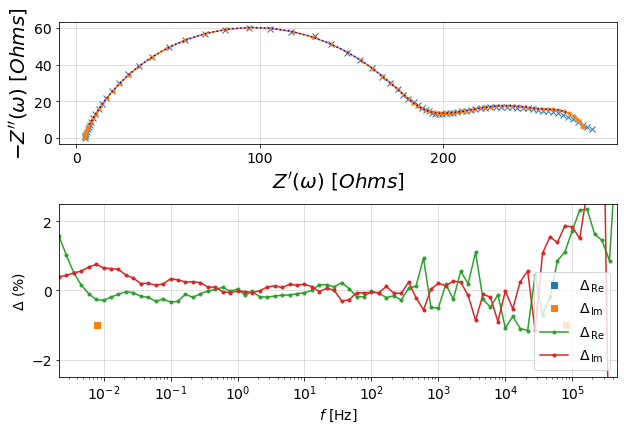

In [11]:
### With 4 CPEs

circ_str = "L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)-p(R4,CPE4)"
R0 = Z_10nh[0].real
inits = [L0, R0, 193, 7.61e-6, .73, 60, 1e-2, .7, 20, 1e-2, .9, 20, 1e-3, .9]

circ = CustomCircuit(circuit=circ_str, initial_guess=inits)
circ.fit(f_10nh, Z_10nh)
Z_sim = circ.predict(f_10nh)
_, axes = plt.subplots(nrows=2, figsize=(10, 7))

plot_nyquist(axes[0], Z_10nh, fmt='x')
plot_nyquist(axes[0], Z_sim)
plot_nyquist(axes[0], circ.predict(f_10), fmt='b:')

res_real = np.real(Z_10nh - Z_sim)/np.abs(Z_10nh)
res_imag = np.imag(Z_10nh - Z_sim)/np.abs(Z_10nh)

plot_residuals(axes[1], [f_10[0], f_10[-1]], np.array([-.01, -.01]), np.array([-.01, -.01]), fmt='s')
plot_residuals(axes[1], f_10nh, res_real, res_imag, y_limits=(-2.5, 2.5))

print(circ, '\n', np.sum(np.sqrt(res_real ** 2)), np.sum(np.sqrt(res_imag ** 2)))
plt.show()


Circuit string: L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)-p(R4,CPE4)-p(R5,CPE5)
Fit: True

Initial guesses:
     L0 = 2.00e-06 [H]
     R0 = 4.51e+00 [Ohm]
     R1 = 1.93e+02 [Ohm]
  CPE1_0 = 7.61e-06 [Ohm^-1 sec^a]
  CPE1_1 = 7.30e-01 []
     R2 = 6.00e+01 [Ohm]
  CPE2_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []
     R3 = 1.00e+01 [Ohm]
  CPE3_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE3_1 = 9.00e-01 []
     R4 = 1.00e+01 [Ohm]
  CPE4_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE4_1 = 9.00e-01 []
     R5 = 1.00e+01 [Ohm]
  CPE5_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE5_1 = 9.00e-01 []

Fit parameters:
     L0 = 7.71e-07  (+/- 1.57e-07) [H]
     R0 = 3.41e+00  (+/- 2.75e-01) [Ohm]
     R1 = 1.80e+02  (+/- 9.82e+00) [Ohm]
  CPE1_0 = 7.29e-06  (+/- 4.57e-07) [Ohm^-1 sec^a]
  CPE1_1 = 7.39e-01  (+/- 1.02e-02) []
     R2 = 1.87e+01  (+/- 1.10e+01) [Ohm]
  CPE2_0 = 9.28e-01  (+/- 1.06e+00) [Ohm^-1 sec^a]
  CPE2_1 = 1.00e+00  (+/- 1.10e-01) []
     R3 = 1.93e+01  (+/- 5.33e+01) [Ohm]
  CPE3_0 = 1.13e-01  (+/- 4.05e

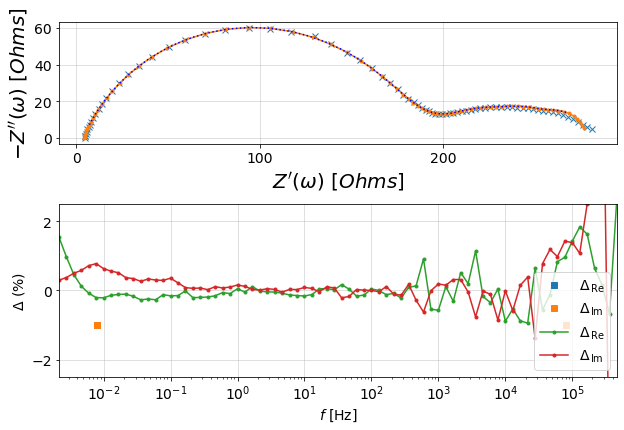

In [12]:
### With 5 CPEs

circ_str = "L0-R0-p(R1,CPE1)-p(R2,CPE2)-p(R3,CPE3)-p(R4,CPE4)-p(R5,CPE5)"
inits = [L0, R0, 193, 7.61e-6, .73, 60, 1e-2, .7, 10, 1e-2, .9, 10, 1e-3, .9, 10, 1e-3, .9]
# inits.extend(est_inits)
# # Still need inits for CPE2_a, R3, and CPE3
# inits.extend([.7, 40, 1e-2, .7])

circ = CustomCircuit(circuit=circ_str, initial_guess=inits)
circ.fit(f_10nh, Z_10nh, )
Z_sim = circ.predict(f_10nh)
_, axes = plt.subplots(nrows=2, figsize=(10, 7))

plot_nyquist(axes[0], Z_10nh, fmt='x')
plot_nyquist(axes[0], Z_sim)
plot_nyquist(axes[0], circ.predict(f_10), fmt='b:')

res_real = np.real(Z_10nh - Z_sim)/np.abs(Z_10nh)
res_imag = np.imag(Z_10nh - Z_sim)/np.abs(Z_10nh)

plot_residuals(axes[1], [f_10[0], f_10[-1]], np.array([-.01, -.01]), np.array([-.01, -.01]), fmt='s')
plot_residuals(axes[1], f_10nh, res_real, res_imag, y_limits=(-2.5, 2.5))

print(circ, '\n', np.sum(np.sqrt(res_real ** 2)), np.sum(np.sqrt(res_imag ** 2)))
plt.show()

## 5 CPE circuit is probably good enough for our use. We only care about what is between 1e5 and 1e-2 Hz because that's the frequency range of patterned electrode measurements. Moreover, the highest frequencies are most important becuase that's where admittance is highest

## Do we care about the apparent series inductance? 
### I can't find any H/m specifications on BNC cables, but using the Berthied subtraction method yields reasonable-ish L values. More importantly, the subtraction process substantially changes the high frequency portion...

## Moving forward
### The circuit we're considering is represented as $Z = R_{\Omega} + \frac{1}{\frac{1}{Z_{NH}} + \frac{1}{R_{constrict}+\frac{1}{\frac{1}{Z_G}+\frac{R_{gate}}{1+j \omega R_{gate} C_{gate}}}}}$

In [13]:
# First subtract high frequency intercepts

Z_1 = Z_1 - Z_1[np.argmin(np.abs(Z_1))].real
Z_10 = Z_10 - Z_10[np.argmin(np.abs(Z_10))].real
Z_100 = Z_100 - Z_100[np.argmin(np.abs(Z_100))].real


Z_1nh = Z_1nh - Z_1nh[np.argmin(np.abs(Z_1nh))].real
Z_10nh = Z_10nh - Z_10nh[np.argmin(np.abs(Z_10nh))].real
Z_100nh = Z_100nh - Z_100nh[np.argmin(np.abs(Z_100nh))].real

Zs_list = [Z_1, Z_10, Z_100]
Zs_nh_list = [Z_1nh, Z_10nh, Z_100nh]

In [14]:
i = 2
fs_list[i] - fs_nh_list[i][high_overlaps[i]: low_overlaps[i]+1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Frequency list 0 sum of differences  0.0011095700002077165
Frequency list 1 sum of differences  0.0
Frequency list 2 sum of differences  0.0


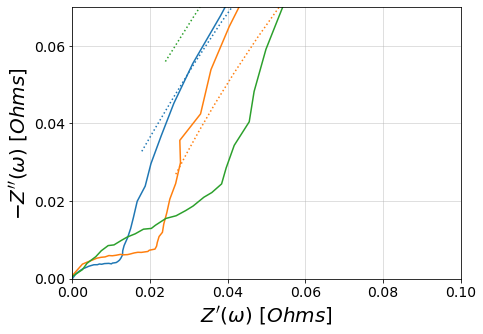

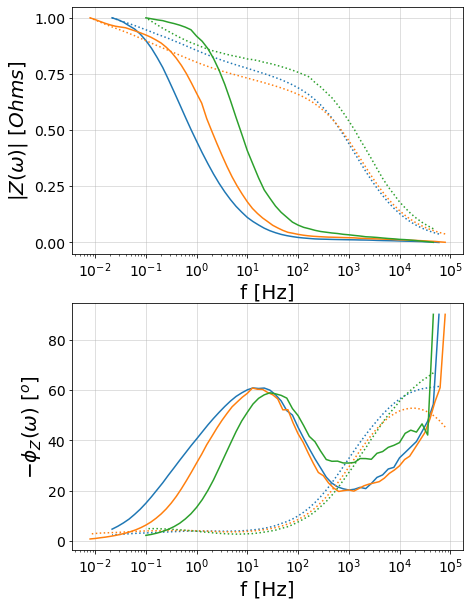

In [15]:
# Adjust NoHole impedance to correct frequency range
Zs_nh = []
fs_nh = []

_, ax = plt.subplots(figsize=(7,5))
_, axes = plt.subplots(nrows=2, figsize=(7, 10))
for i, (low_ind, high_ind) in enumerate(zip(low_overlaps, high_overlaps)):
    if i != 1:
        Zs_nh.append(Zs_nh_list[i][high_overlaps[i]: low_overlaps[i]+1])
        fs_nh.append(fs_nh_list[i][high_overlaps[i]: low_overlaps[i]+1])
    else:
        Zs_nh.append(circ.predict(f_10))
        fs_nh.append(f_10)
    print(f'Frequency list {i} sum of differences  {np.sum(fs_list[i] - fs_nh[i])}')
    
    plot_nyquist(ax, Zs_list[i] / np.max(np.abs(Zs_list[i])), fmt='-')
    c = ax.lines[-1].get_color()
    plot_nyquist(ax, Zs_nh[i] / np.max(np.abs(Zs_nh[i])), fmt=':', color=c)
    
    plot_bode(axes, fs_list[i], Zs_list[i] / np.max(np.abs(Zs_list[i])), fmt='-')
    c = axes[0].lines[-1].get_color()
    plot_bode(axes, fs_nh[i], Zs_nh[i] / np.max(np.abs(Zs_nh[i])), fmt=':', color=c)
    
ax.set_xlim(0, .1)
ax.set_ylim(0, .07)
plt.show()

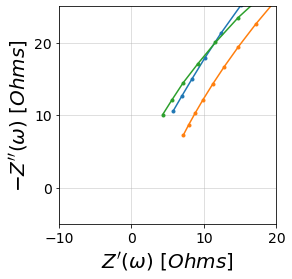

In [16]:
_, ax = plt.subplots()

for i, z in enumerate(Zs_nh):
    plot_nyquist(ax, z)
    dum = pd.DataFrame(data=np.array([fs_nh[i], Zs_nh[i].real, Zs_nh[i].imag]).T, columns=["f", "Z'", "Z''"])
#     dum.to_csv(path_or_buf=f'..\\EIS Data\\NoHoleAl2O3_July18_freq_range_{10 ** i}%O2.csv', index=False)

ax.set_xlim(-10, 20)
ax.set_ylim(-5, 25)
plt.show()

In [17]:
# Scale NoHole sample measurements to patterned electrode geometry

# Some geometry calculations
A_NH = np.pi * (0.65**2)
L_NH = 450e-7
A_gate = 1.04345 * 4.478e-4
A_patt = .35**2 - A_gate #0.110 - A_gate  #0.117
L_LSC = 600e-7
L_patt = 280e-7

# Correction factor for patterned geometry to NH geometry
geom_corr = A_NH/A_patt*L_patt/L_NH

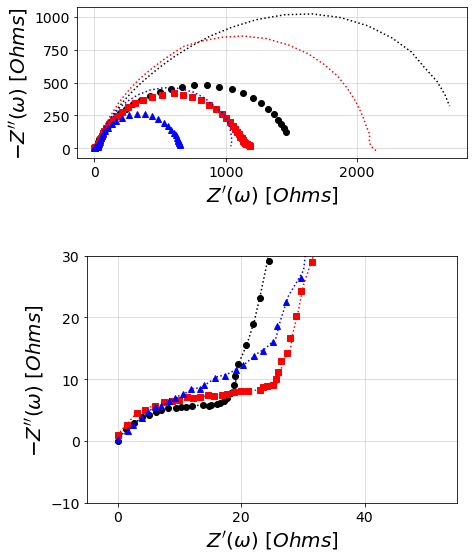

In [21]:
# Need to invert to admittances, subtract NoHole admittance from patterned sample admittance,
# invert back to impedance and check results

Ys_list, Ys_nh_list = [], []
Zs_adj_list = []
geom_corr = 9.77

_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (Z, Z_nh) in enumerate(zip(Zs_list, Zs_nh)):
    Y = 1 / Z
    Y_nh = 1 / (Z_nh * geom_corr)
    Ys_list.append(Y)
    Ys_nh_list.append(Y_nh)
    
    Z_adj = 1 / (Y - Y_nh)
    Zs_adj_list.append(Z_adj)
    
    for ax in axes:
        plot_nyquist(ax, Z, ls='', marker=markers[i], color=colors[i])
        plot_nyquist(ax, Z_adj, fmt = ':', color=colors[i])

axes[1].set_xlim(-5, 55)
axes[1].set_ylim(-10, 30)
plt.show()

More than one peak detected. Returning lowest-frequency values.
More than one peak detected. Returning lowest-frequency values.


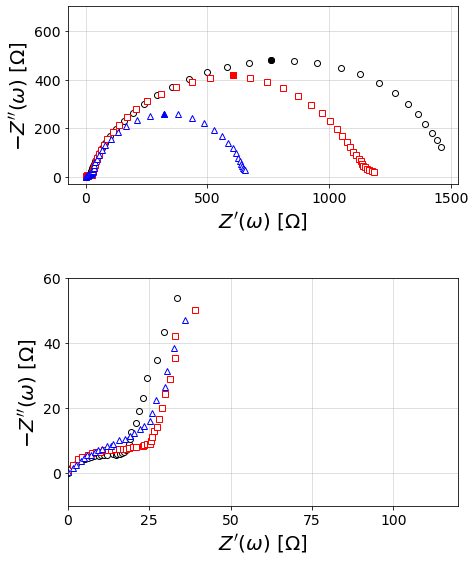

In [62]:
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

_, axes = plt.subplots(nrows=2, figsize=(7, 10))
for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    f_peak, Z_peak = ic.find_peak_f_Z(f, Z)
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')
    plot_nyquist(axes[1], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

# Scratch

In [20]:
def C_chem_mix(delta):
    d = delta
    F = 96485
    R = 8.314
    T = 973
    Vm = 35.914
    
    cfit = 228000
    
    return 4 * F**2 / (Vm * (cfit + R * T / d))

def ASR(Ao, xvo, tg):
    F = 96485
    R = 8.314
    T = 973
    co = 3 / 35.914
    L = 600e-7
    return R * T / (4 * F**2) * Ao * tg / (co * xvo * L) 

## Read in 2D simulations

In [37]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\2D\Table Exports\EIS Tables\\"
file_dir = r'..\\EIS Data\\'
Gg = r'G-2_14'
f = r'Measured'

all_files = an_com.get_all_files(file_dir, Gg, f)
all_files.sort(key=an_com.sort_by_pO2)
all_files

['..\\\\EIS Data\\G-2_14_f-MeasuredEIS_MB_pO2-0_01.csv',
 '..\\\\EIS Data\\G-2_14_f-MeasuredEIS_MB_pO2-0_1.csv',
 '..\\\\EIS Data\\G-2_14_f-MeasuredEIS_MB_pO2-1.csv']

Filtered 0 data points with positive Im[Z]
(67.98450853054945-0.5336962862305097j) 0.129155
Filtered 0 data points with positive Im[Z]
(68.19162966400076-0.679250882207783j) 0.3162278
Filtered 0 data points with positive Im[Z]
(69.15029350383435-1.4521885083563664j) 1.6681009999999998


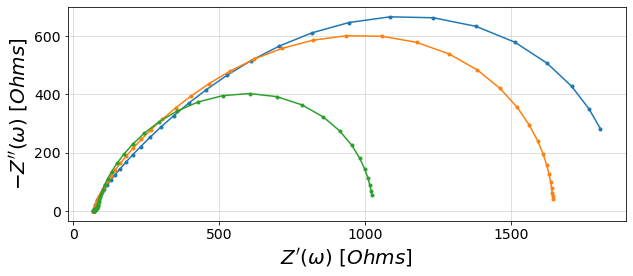

In [38]:
 _, ax = plt.subplots(figsize=(10,7))
fs_2D, Zgs_2D = [], []

Z_key = 'dimensional impedance from MC gate, scaled (m/A)'
#         'dimensional impedance from LT edge (m/A)'
for file in all_files:
    dum = pd.read_csv(file, skiprows=4)
    f, Z_lt = an_com.extract_Zdim(dum, Z_key=Z_key, ignore_posZ=False)
    print(Z_lt[-1], f[np.argmin(Z_lt.imag)])
    Zgs_2D.append(Z_lt)
    fs_2D.append(f)
    plot_nyquist(ax, Z_lt)

plt.show()

### Look at predictions compared to data

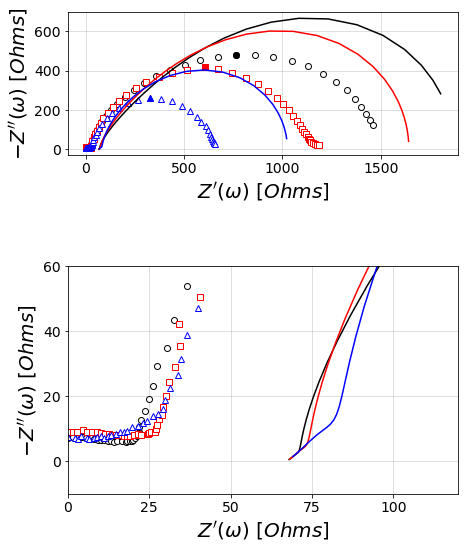

In [39]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


for i, (f, Z) in enumerate(zip(fs_2D, Zgs_2D)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt='-')
    plot_nyquist(axes[1], Z, c=colors[i], fmt='-')

axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()


Estimate ohmic resistance from electrolyte, then subtract from all measurements.

In [24]:
sig_i_lt = 0.0544
a = .1095
l_lt = 0.2
R_ohm_est = 1 / sig_i_lt * l_lt /a
R_ohm_est

33.57507386516251

In [25]:
for i, (Zs, Zgs) in enumerate(zip(Zs_list, Zgs_2D)):
    Zs_list[i] = Zs - R_ohm_est
    Zgs_2D[i] = Zgs - R_ohm_est

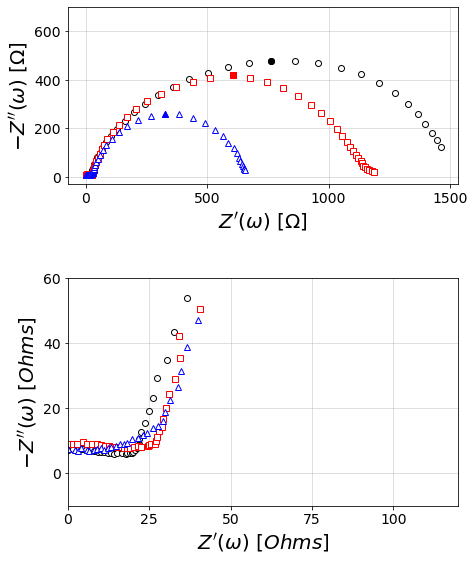

In [26]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


for i, (f, Z) in enumerate(zip(fs_2D, Zgs_2D)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt='-')
    plot_nyquist(axes[1], Z, c=colors[i], fmt='-')

axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

In [27]:
for i, fs in enumerate(fs_list):
    fs_as_str = " ".join([str(f) for f in fs])
    fs_as_str = "f \"" + fs_as_str + "\""
    print(fs_as_str)
    np.savetxt(f"D:\COMSOL\PatternedFilm_Potentiodynamic\EIS_{10 ** i}%O2_frequencies.txt",
               [fs_as_str],
               fmt = '%s',
               delimiter='',
               newline=''
              )

f "100000.0 77426.37 59948.43 46415.89 35938.14 27825.59 21544.35 16681.01 12915.5 10000.0 7742.637 5994.842 4641.589 3593.814 2782.559 2154.435 1668.101 1291.55 1000.0 774.2637 599.4843 464.1589 359.3814 278.256 215.4435 166.8101 129.155 100.0 77.42637 59.94843 46.41589 35.93814 27.82559 21.54435 16.68101 12.9155 10.0 7.742637 5.994843 4.641589 3.593814 2.782559 2.154435 1.668101 1.29155 1.0 0.7742637 0.5994843 0.4641589 0.3593814 0.2782559 0.2154435 0.1668101 0.129155 0.1 0.07742637 0.05994843 0.04641589 0.03593814 0.02782559 0.02154435"
f "100000.0 79432.82 63095.73 50118.72 39810.72 31622.78 25118.87 19952.62 15848.93 12589.25 10000.0 7943.282 6309.573 5011.873 3981.072 3162.278 2511.886 1995.262 1584.893 1258.925 1000.0 794.3282 630.9573 501.1872 398.1072 316.2278 251.1886 199.5262 158.4893 125.8925 100.0 79.43282 63.09573 50.11872 39.81072 31.62278 25.11886 19.95262 15.84893 12.58925 10.0 7.943282 6.309574 5.011872 3.981072 3.162278 2.511886 1.995262 1.584893 1.258925 1.0 0.79432